# Penguins

Penguins are cool!

1. [Import Libraries](#1.-Import-Libraries)
2. [Load Data](#2.-Load-Data)
3. [EDA](#3.-EDA)
4. [Data Preprocessing](#4.-Data-Preprocessing)
5. [ML](#5.-ML)
   
   ...
7. [Compare Models](#6.-Compare-Models)
8. [Conclusion](#7.-Conclusion)

### 1. Import Libraries
[Back to Top](#Penguins) <br>

In [1]:
# # run this cell only once to install any packages we might not have yet, comment after the first run
# ! pip install jupyternotify
# %load_ext jupyternotify
# ! pip install pandas
# ! pip install matplotlib
# ! pip install seaborn
# ! pip install scikit-learn

In [2]:
import numpy as np

import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

import matplotlib.pyplot as plt
# plt.rcParams['figure.dpi'] = 300
# plt.rcParams["axes.spines.right"] = False
# plt.rcParams["axes.spines.top"] = False
plt.rcParams["figure.figsize"] = (6, 4)

import seaborn as sns
sns.set(style="whitegrid")

island_colors = ['#FF77FF', '#FFE600', '#00FFFE']
gender_colors = ['#F8C8DC', '#6495ED']
species_colors = ['#66B2B2', '#FFB732', '#AE5DAE']
species_order = ['Adelie', 'Chinstrap', 'Gentoo']

import warnings
warnings.filterwarnings('ignore')

### 2. Load Data
[Back to Top](#Penguins) <br>

In [3]:
# # run this cell only once to download the data, comment after the first run
# ! kaggle datasets list -s 'penguin'
# ! kaggle datasets download -d 'samybaladram/palmers-penguin-dataset-extended'
# ! unzip 'palmers-penguin-dataset-extended.zip' -d data/
# ! rm 'palmers-penguin-dataset-extended.zip'
df = pd.read_csv('data/palmerpenguins_original.csv').sort_values(['year', 'island', 'species', 'sex'])

### 3. EDA
[Back to Top](#Penguins) <br>

In [4]:
# Common functions for EDA

def set_bar_labels(axis_name):
    '''set bar value labels for 1 graph'''
    for i in axis_name.containers:
        axis_name.bar_label(i,)

def set_grid(axis):
    '''define a nice grid for 1 graph'''
    axis.grid(False)
    axis.grid(which='major', axis='y', linewidth=0.2, color='grey')

In [5]:
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
20,Adelie,Biscoe,37.8,18.3,174.0,3400.0,female,2007
22,Adelie,Biscoe,35.9,19.2,189.0,3800.0,female,2007
25,Adelie,Biscoe,35.3,18.9,187.0,3800.0,female,2007
27,Adelie,Biscoe,40.5,17.9,187.0,3200.0,female,2007
28,Adelie,Biscoe,37.9,18.6,172.0,3150.0,female,2007
21,Adelie,Biscoe,37.7,18.7,180.0,3600.0,male,2007
23,Adelie,Biscoe,38.2,18.1,185.0,3950.0,male,2007
24,Adelie,Biscoe,38.8,17.2,180.0,3800.0,male,2007
26,Adelie,Biscoe,40.6,18.6,183.0,3550.0,male,2007
29,Adelie,Biscoe,40.5,18.9,180.0,3950.0,male,2007


In [6]:
# count of rows and columns
df.shape

(344, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 344 entries, 20 to 131
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 24.2+ KB


In [8]:
# How many null values are in each column?
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [9]:
df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].describe().round(1)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.0,342.0,342.0,342.0
mean,43.9,17.2,200.9,4201.8
std,5.5,2.0,14.1,802.0
min,32.1,13.1,172.0,2700.0
25%,39.2,15.6,190.0,3550.0
50%,44.4,17.3,197.0,4050.0
75%,48.5,18.7,213.0,4750.0
max,59.6,21.5,231.0,6300.0


In [10]:
# Frequency Table
columns = ['island', 'species', 'sex']
df[columns].value_counts().reset_index(name='count').sort_values(columns).reset_index(drop=True)

,island,species,sex,count
0,Biscoe,Adelie,female,22
1,Biscoe,Adelie,male,22
2,Biscoe,Gentoo,female,58
3,Biscoe,Gentoo,male,61
4,Dream,Adelie,female,27
5,Dream,Adelie,male,28
6,Dream,Chinstrap,female,34
7,Dream,Chinstrap,male,34
8,Torgersen,Adelie,female,24
9,Torgersen,Adelie,male,23


In [11]:
# Penguin counts for each species
df['species'].value_counts().sort_index()

species
Adelie       152
Chinstrap     68
Gentoo       124
Name: count, dtype: int64

In [12]:
# Penguin counts for each island
df['island'].value_counts().sort_index()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [13]:
# Penguin counts for each year
df['year'].value_counts().sort_index()

year
2007    110
2008    114
2009    120
Name: count, dtype: int64

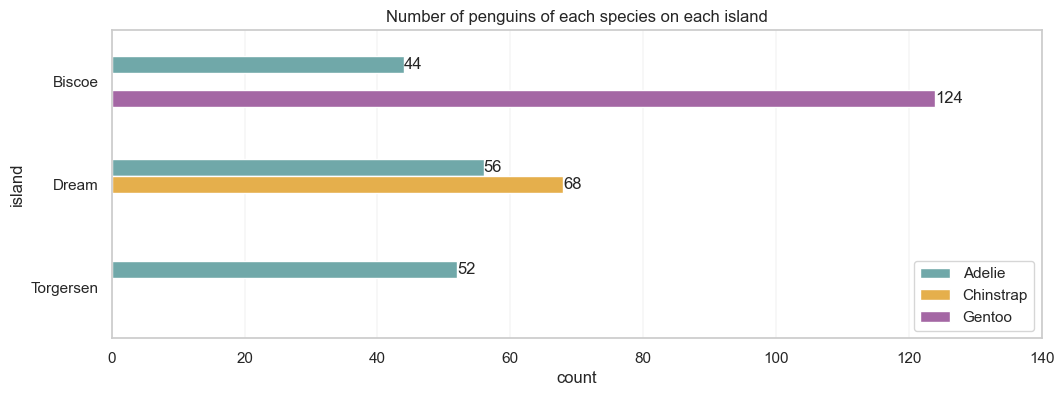

,island,species,count
4,Biscoe,Adelie,44
0,Biscoe,Gentoo,124
2,Dream,Adelie,56
1,Dream,Chinstrap,68
3,Torgersen,Adelie,52


In [14]:
plt.figure(figsize=[12, 4])
title = 'Number of penguins of each species on each island'
plt.title(title)

ax = sns.countplot(df, y='island', hue='species', palette=species_colors, hue_order=species_order, width=0.5, dodge=True)
set_bar_labels(ax)

plt.grid(which='major', axis='x', linewidth=0.2)
plt.xlim(0, 140)
plt.legend(loc='lower right') 
plt.show()

columns = ['island', 'species']
df[columns].value_counts().reset_index(name='count').sort_values(columns)

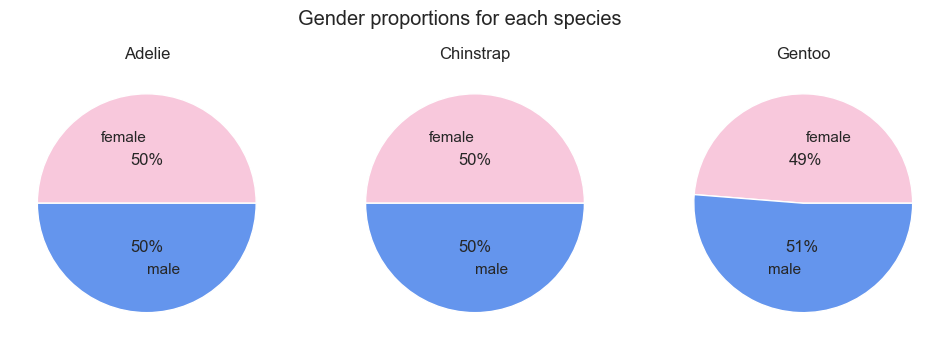

In [15]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(12, 4))
figure.suptitle('Gender proportions for each species')
species_sex_counts = df[['species', 'sex']].value_counts().reset_index(name='count').sort_values(by=['species', 'sex'])

Adelie = species_sex_counts[species_sex_counts['species'] == 'Adelie']
axes[0].set_title('Adelie')
axes[0].pie(Adelie['count'], labels=Adelie['sex'], colors=gender_colors, autopct='%.0f%%', pctdistance=0.4, labeldistance=0.6)

Chinstrap = species_sex_counts[species_sex_counts['species'] == 'Chinstrap']
axes[1].set_title('Chinstrap')
axes[1].pie(Chinstrap['count'], labels=Chinstrap['sex'], colors=gender_colors, autopct='%.0f%%', pctdistance=0.4, labeldistance=0.6)

Gentoo = species_sex_counts[species_sex_counts['species'] == 'Gentoo']
axes[2].set_title('Gentoo')
axes[2].pie(Gentoo['count'], labels=Gentoo['sex'], colors=gender_colors, autopct='%.0f%%', pctdistance=0.4, labeldistance=0.6)

plt.show() 

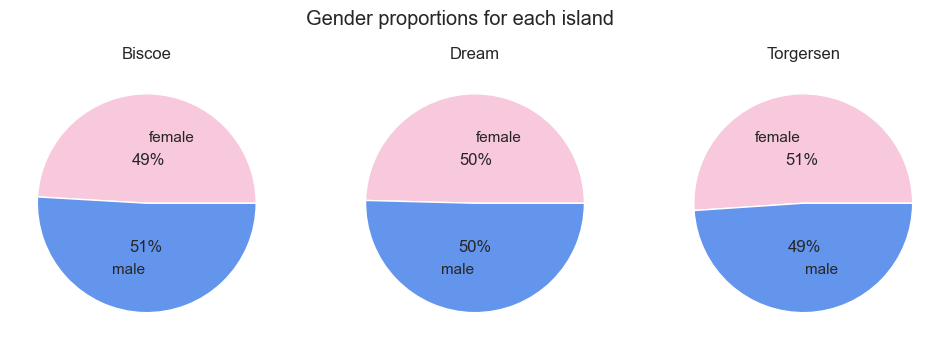

In [16]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(12, 4))
figure.suptitle('Gender proportions for each island')
island_sex_counts = df[['island', 'sex']].value_counts().reset_index(name='count').sort_values(by=['island', 'sex'])

Biscoe = island_sex_counts[island_sex_counts['island'] == 'Biscoe']
axes[0].set_title('Biscoe')
axes[0].pie(Biscoe['count'], labels=Biscoe['sex'], colors=gender_colors, autopct='%.0f%%', pctdistance=0.4, labeldistance=0.6)

Dream = island_sex_counts[island_sex_counts['island'] == 'Dream']
axes[1].set_title('Dream')
axes[1].pie(Dream['count'], labels=Dream['sex'], colors=gender_colors, autopct='%.0f%%', pctdistance=0.4, labeldistance=0.6)

Torgersen = island_sex_counts[island_sex_counts['island'] == 'Torgersen']
axes[2].set_title('Torgersen')
axes[2].pie(Torgersen['count'], labels=Torgersen['sex'], colors=gender_colors, autopct='%.0f%%', pctdistance=0.4, labeldistance=0.6)

plt.show()

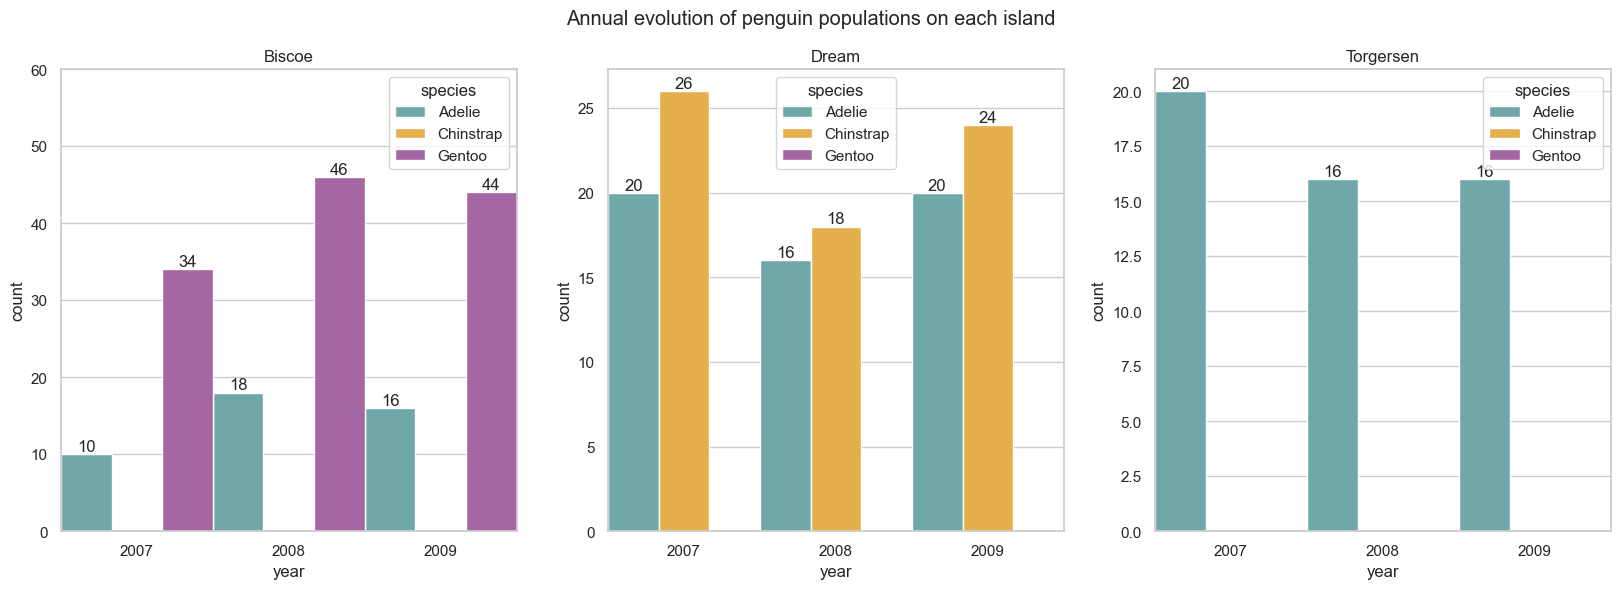

In [17]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(20, 6))
figure.suptitle('Annual evolution of penguin populations on each island')
axes[0].set_ylim(0, 60)

axes[0].set_title('Biscoe')
Biscoe = df[df['island'] == 'Biscoe']
sns.countplot(x='year', data=Biscoe, hue='species', ax=axes[0], palette=species_colors, hue_order=species_order, width=1, dodge=True)
set_bar_labels(axes[0])

axes[1].set_title('Dream')
Dream = df[df['island'] == 'Dream']
sns.countplot(x='year', data=Dream, hue='species', ax=axes[1], palette=species_colors, hue_order=species_order, width=1, dodge=True)
set_bar_labels(axes[1])

axes[2].set_title('Torgersen')
Torgersen = df[df['island'] == 'Torgersen']
sns.countplot(x='year', data=Torgersen, hue='species', ax=axes[2], palette=species_colors, hue_order=species_order, width=1, dodge=True)
set_bar_labels(axes[2])

plt.show()

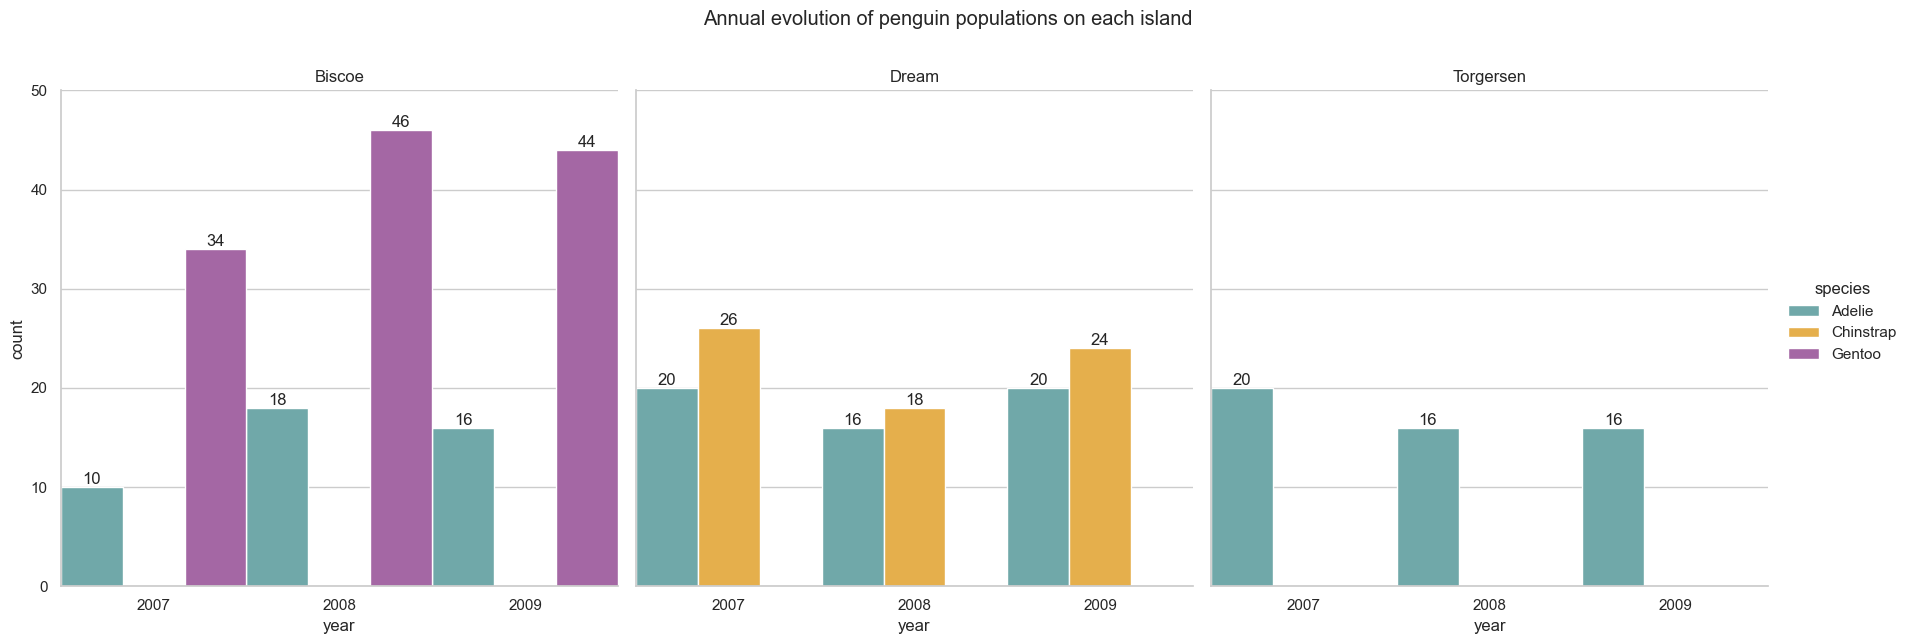

In [18]:
graph = sns.catplot(df, x='year', hue='species', col='island', kind='count', 
                    palette=species_colors, hue_order=species_order, width=1, dodge=True, height=6)

plt.suptitle('Annual evolution of penguin populations on each island', y=1.07)
plt.ylim(0, 50)

# set value labels on bars on every sub-graph
for ax in graph.axes.ravel():
    set_bar_labels(ax)
    sub_graph_title = ax.title.get_text().replace('island = ', '')
    ax.set_title(sub_graph_title)

plt.show()

In [19]:
# Preparing data for plotting histograms
# keep only the columns we need for the histograms
column_indices = [0] + list(range(2, 6, 1))
data_for_distributions = df.iloc[:, column_indices]

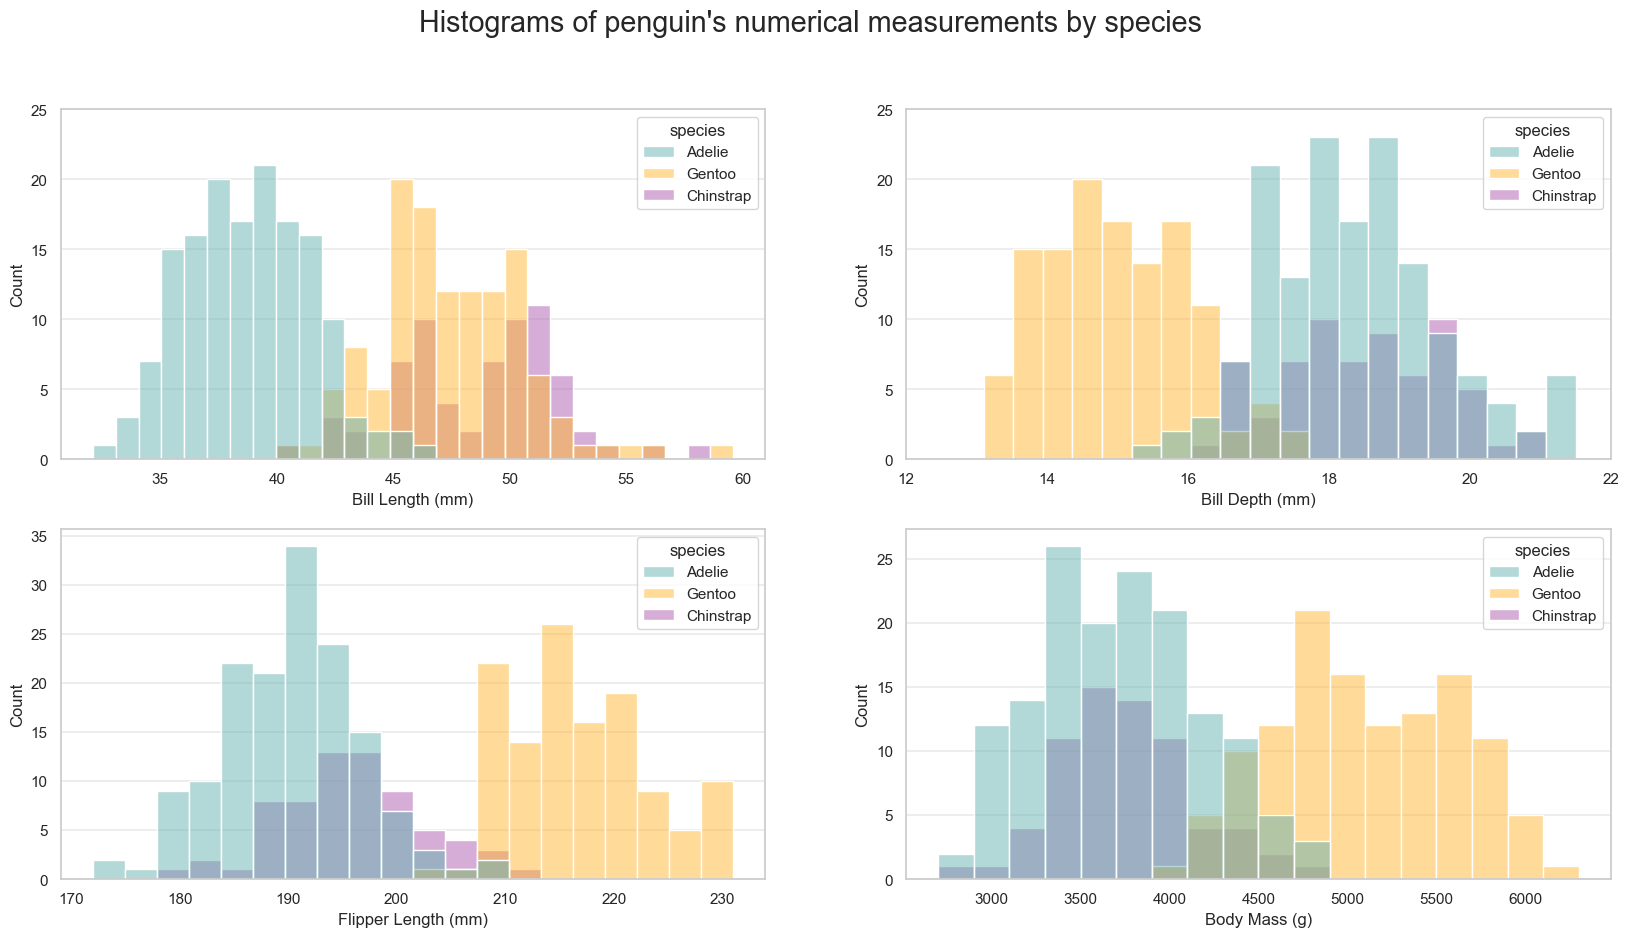

In [20]:
figure, axes = plt.subplots(2, 2, figsize=(20, 10)) 
figure.suptitle("Histograms of penguin's numerical measurements by species", fontsize='xx-large')

axes[0, 0].set_xlabel('Bill Length (mm)')
axes[0, 0].set_ylim(0, 25)
set_grid(axes[0, 0])
sns.histplot(data_for_distributions, x='bill_length_mm', hue='species', ax=axes[0, 0], palette=species_colors, binwidth=1)

axes[0, 1].set_xlabel('Bill Depth (mm)')
axes[0, 1].set_ylim(0, 25)
axes[0, 1].set_xlim(12, 22)
set_grid(axes[0, 1])
sns.histplot(data_for_distributions, x='bill_depth_mm', hue='species', ax=axes[0, 1], palette=species_colors, bins=20)

axes[1, 0].set_xlabel('Flipper Length (mm)')
set_grid(axes[1, 0])
sns.histplot(data_for_distributions, x='flipper_length_mm', hue='species', ax=axes[1, 0], palette=species_colors, bins=20)

axes[1, 1].set_xlabel('Body Mass (g)')
set_grid(axes[1, 1])
sns.histplot(data_for_distributions, x='body_mass_g', hue='species', ax=axes[1, 1], palette=species_colors, binwidth=200)

plt.show()

In [21]:
# Preparing data for boxen plots
columns = ['species', 'sex', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
wide_data = df[columns]

# Scale the measurements
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
wide_data.iloc[:, 2:] = sc.fit_transform(wide_data.iloc[:, 2:])

wide_data.columns = wide_data.columns.str.replace('_mm', '_scaled')
wide_data.rename(columns={'body_mass_g': 'body_mass_scaled'}, inplace=True)
columns = wide_data.columns

long_data = pd.melt(wide_data, id_vars=columns[0:2], value_vars=columns[2:], var_name='measurement_type', value_name='measurement')
long_data.sort_values(['species', 'sex'] , inplace=True)

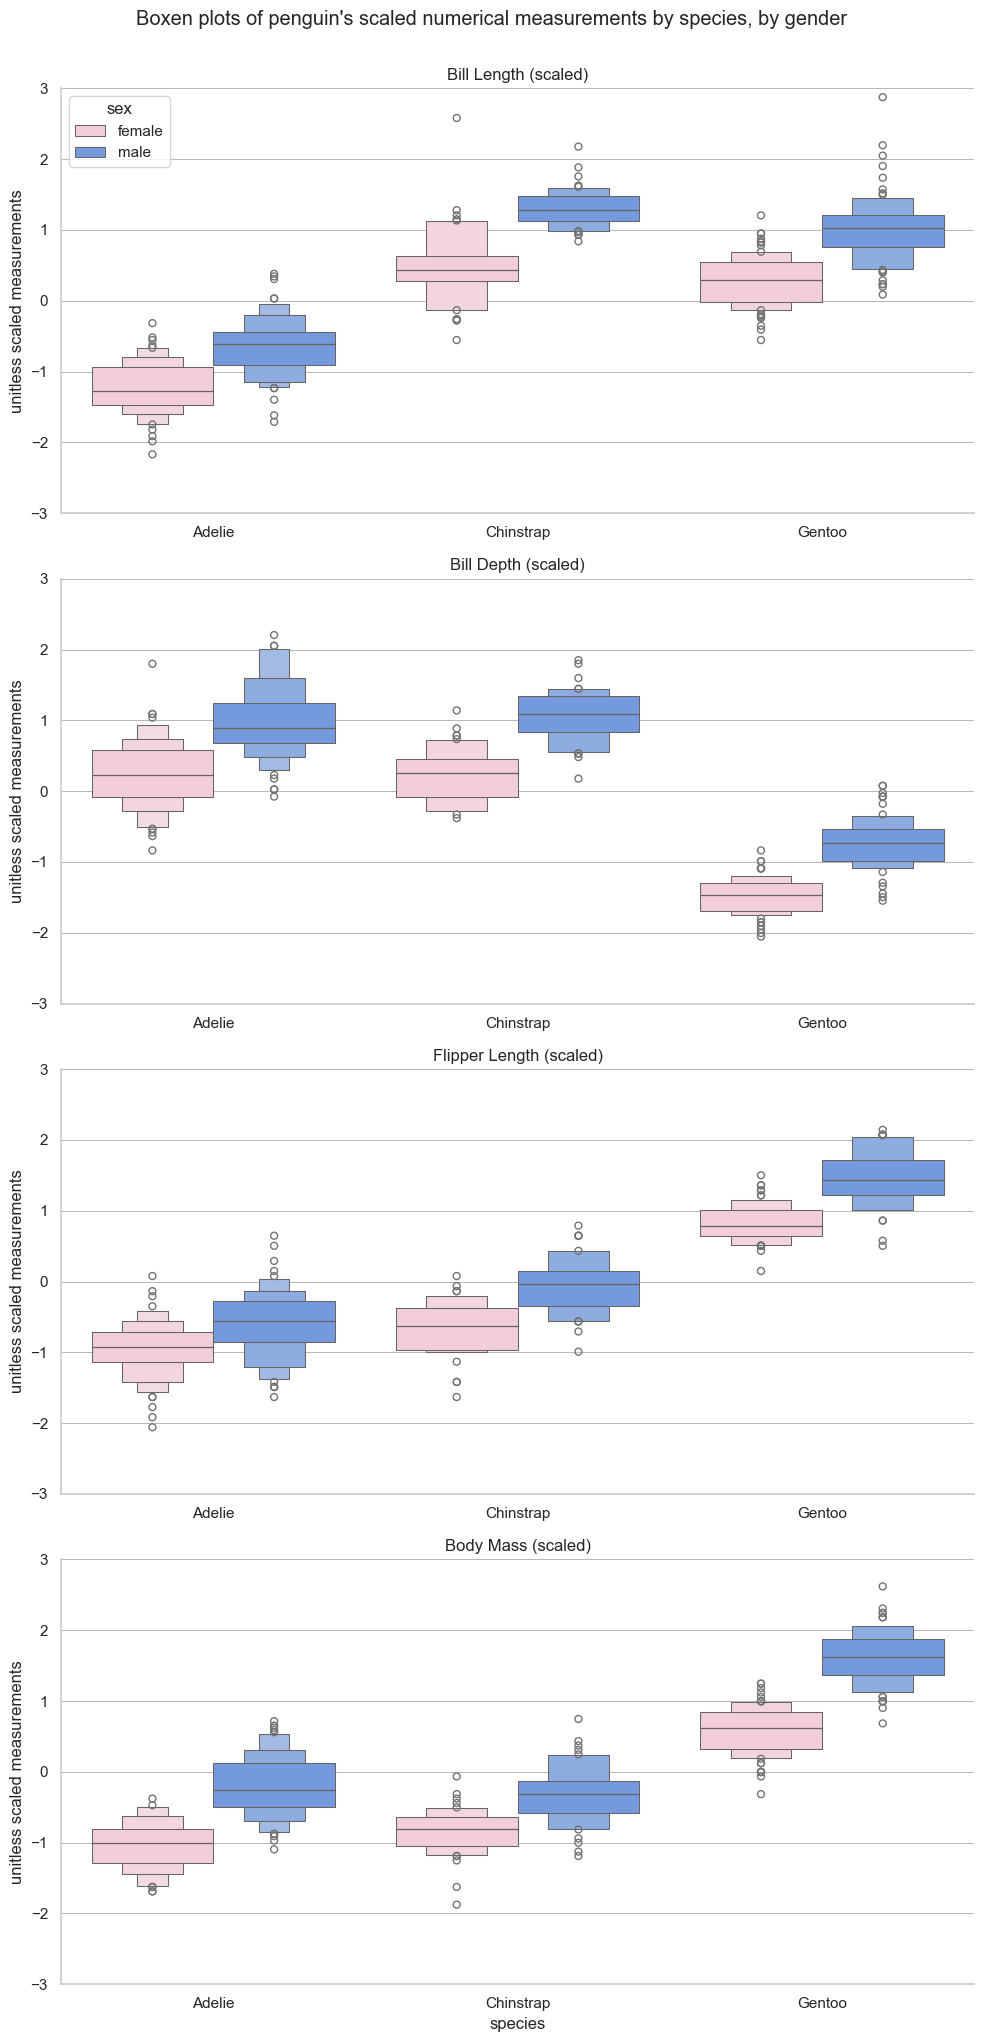

In [22]:
graph = sns.catplot(long_data, 
                    kind='boxen', 
                    x='species', 
                    y='measurement', 
                    row='measurement_type',
                    hue='sex', 
                    palette=gender_colors, 
                    height=5,
                    aspect=2, 
                    legend_out=False, 
                    sharey=True, 
                    sharex=False)
                    
plt.suptitle("Boxen plots of penguin's scaled numerical measurements by species, by gender", fontsize='large', y=1.02)
graph.set_xlabels('species')
graph.set_ylabels('unitless scaled measurements')

# make nicer headings for each sub-graph, set y limit and set grid
for ax in graph.axes.ravel():
    sub_graph_title = ax.title.get_text() \
                        .replace('measurement_type = ', '') \
                        .replace('_', ' ') \
                        .title() \
                        .replace('Scaled', '(scaled)')
    
    ax.set_title(sub_graph_title)
    ax.set_ylim(-3, 3)
    ax.grid(False)
    ax.grid(which='major', axis='y', linewidth=0.4, color='grey')

plt.show()

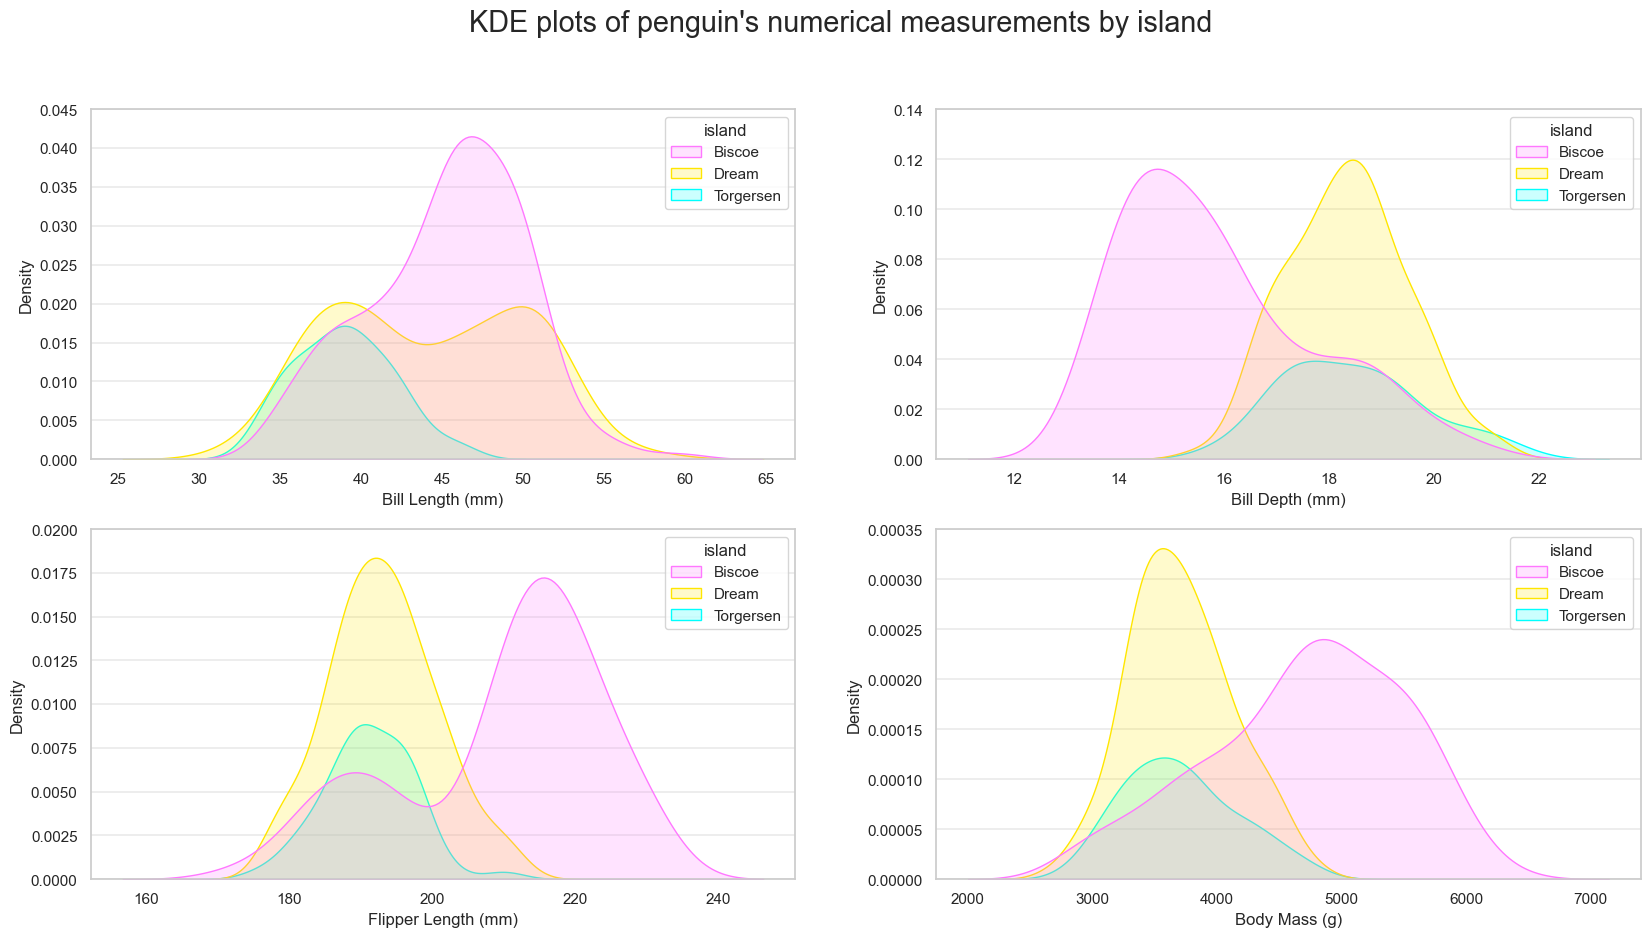

In [23]:
figure, axes = plt.subplots(2, 2, figsize=(20, 10))
figure.suptitle("KDE plots of penguin's numerical measurements by island", fontsize='xx-large')

axes[0, 0].set_xlabel('Bill Length (mm)')
axes[0, 0].set_ylim(0, 0.045)
set_grid(axes[0, 0])
sns.kdeplot(df, x='bill_length_mm', hue='island', ax=axes[0, 0], fill=True, palette=island_colors, linewidth=1, alpha=0.2)

axes[0, 1].set_xlabel('Bill Depth (mm)')
axes[0, 1].set_ylim(0, 0.14)
set_grid(axes[0, 1])
sns.kdeplot(df, x='bill_depth_mm', hue='island', ax=axes[0, 1], fill=True, palette=island_colors, linewidth=1, alpha=0.2)

axes[1, 0].set_xlabel('Flipper Length (mm)')
axes[1, 0].set_ylim(0, 0.02)
set_grid(axes[1, 0])
sns.kdeplot(df, x='flipper_length_mm', hue='island', ax=axes[1, 0], fill=True, palette=island_colors, linewidth=1, alpha=0.2)

axes[1, 1].set_xlabel('Body Mass (g)')
axes[1, 1].set_ylim(0, 0.00035)
set_grid(axes[1, 1])
sns.kdeplot(df, x='body_mass_g', hue='island', ax=axes[1, 1], fill=True, palette=island_colors, linewidth=1, alpha=0.2)

plt.show()

### 4. Data Preprocessing
[Back to Top](#Penguins) <br>

### 5. ML
[Back to Top](#Penguins) <br>

### 6. Compare Models
[Back to Top](#Penguins) <br>

### 7. Conclusion
[Back to Top](#Penguins) <br>